# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{10} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* aaa
  * aaa
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 
df_chl_out_7D_3 = pd.read_csv('./data_collector_modisa_chla9km/df_chl_out_7D_modisa_3.csv', \
                              index_col='index')
df_chl_out_7D_3

,id,time,var_tmp,lon,spd,ve,var_lat,lat,var_lon,temp,vn,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,1000.000000,67.351188,11.188906,-6.823625,0.000352,10.873656,0.000996,NaN,6.509875,0.137771,-0.860842,-0.012681,NaN,520.4050
3888,11089,2002-11-01,0.003679,65.099156,13.679406,-11.122000,0.000057,14.269219,0.000106,28.969813,4.337844,0.152450,-0.816873,0.027142,-1.566358,822.7430
3908,34710,2002-11-01,0.001698,63.145031,12.432687,0.757312,0.000064,17.038563,0.000123,28.970219,11.684344,0.383868,-0.415819,0.059694,-1.224066,584.0640
4145,10206,2002-11-09,1000.000000,67.108219,3.428062,-0.786375,0.000984,11.155719,0.003551,NaN,1.562844,0.132682,-0.877188,-0.005089,NaN,545.1970
4147,11089,2002-11-09,0.003868,64.193281,19.677781,-17.539250,0.000065,14.220969,0.000126,28.742188,-6.951906,0.201879,-0.694909,0.049429,-1.306018,858.3870
4149,15707,2002-11-09,1000.000000,67.022625,23.783812,-12.393500,0.000075,12.926656,0.000150,NaN,-15.661781,0.153961,-0.812589,-0.005174,NaN,580.7750
4167,34710,2002-11-09,0.001878,63.000156,26.598219,-2.723375,0.000065,17.952812,0.000126,28.255188,25.294281,0.442761,-0.353831,0.058893,-1.229935,513.0270
4173,34721,2002-11-09,0.001813,68.182750,18.274406,8.236687,0.000063,12.879281,0.000124,29.291313,12.886094,0.151290,-0.820190,0.003190,-2.496244,457.1560
4426,34710,2002-11-17,0.001815,62.227781,51.033437,-25.647250,0.000075,20.239094,0.000152,27.549469,42.687531,0.466490,-0.331158,0.023729,-1.624715,327.3360


In [3]:
check1 = df_chl_out_7D_3.chl_rate/ df_chl_out_7D_3.chlor_a 
check2 = df_chl_out_7D_3.chl_rate.divide(df_chl_out_7D_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

0.0

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_7D_3['chlor_a_log10_rate'] = pd.Series(np.array(check2), index=df_chl_out_7D_3.index)
df_chl_out_7D_3.head()

,id,time,var_tmp,lon,spd,ve,var_lat,lat,var_lon,temp,vn,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,1000.000000,67.351188,11.188906,-6.823625,0.000352,10.873656,0.000996,NaN,6.509875,0.137771,-0.860842,-0.012681,NaN,520.405,-0.092044
3888,11089,2002-11-01,0.003679,65.099156,13.679406,-11.122000,0.000057,14.269219,0.000106,28.969813,4.337844,0.152450,-0.816873,0.027142,-1.566358,822.743,0.178039
3908,34710,2002-11-01,0.001698,63.145031,12.432687,0.757312,0.000064,17.038563,0.000123,28.970219,11.684344,0.383868,-0.415819,0.059694,-1.224066,584.064,0.155508
4145,10206,2002-11-09,1000.000000,67.108219,3.428062,-0.786375,0.000984,11.155719,0.003551,NaN,1.562844,0.132682,-0.877188,-0.005089,NaN,545.197,-0.038355
4147,11089,2002-11-09,0.003868,64.193281,19.677781,-17.539250,0.000065,14.220969,0.000126,28.742188,-6.951906,0.201879,-0.694909,0.049429,-1.306018,858.387,0.244845


In [5]:
df_chl_out_7D_3.chlor_a_log10_rate.describe()  # more scattered on the left hand side

count    692.000000
mean      -0.199056
std        1.171989
min      -14.259539
25%       -0.229202
50%       -0.020921
75%        0.177646
max        0.930792
Name: chlor_a_log10_rate, dtype: float64

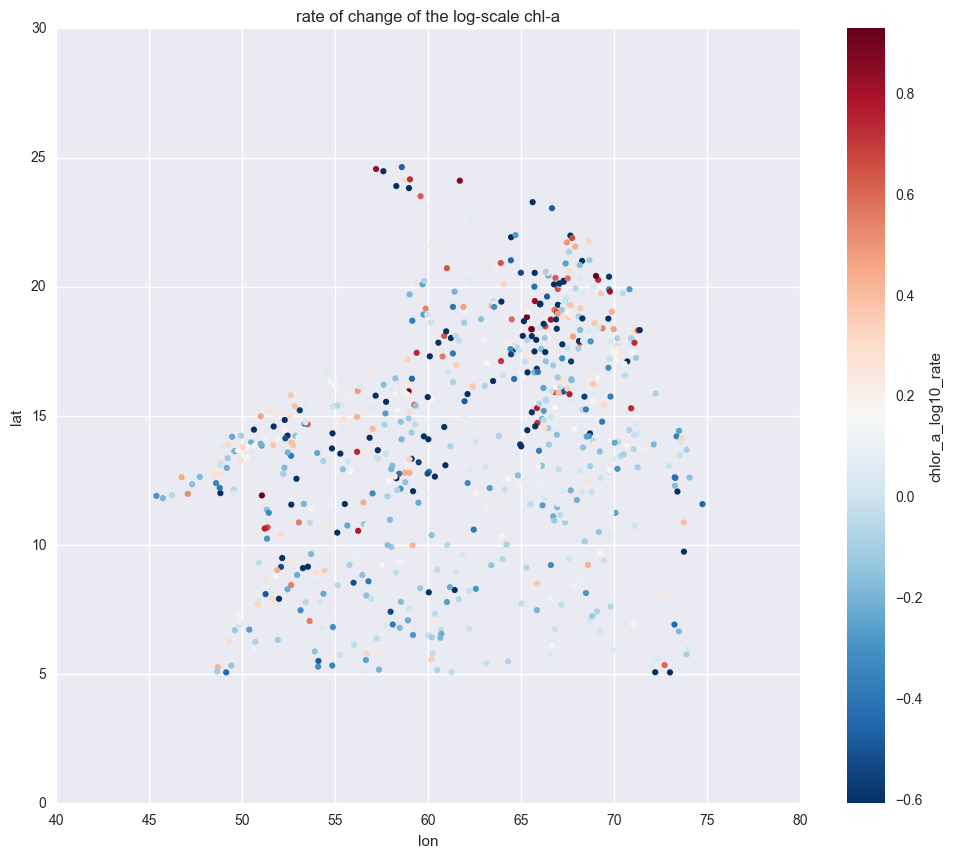

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_7D_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_log10_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

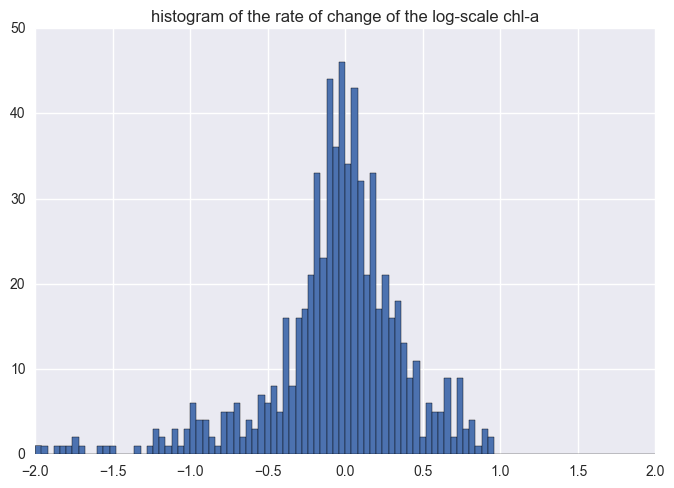

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_7D_3.chlor_a_log10_rate.dropna().hist(bins=100,range=[-2,2]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

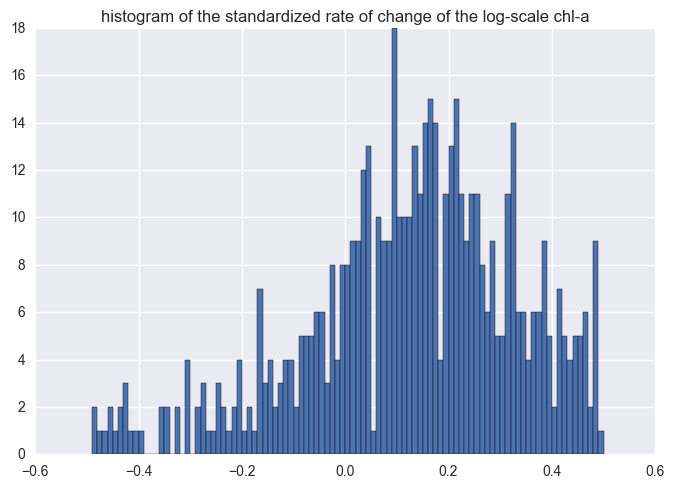

In [8]:
# standarized series
tmp = df_chl_out_7D_3.chlor_a_log10_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-0.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [9]:
# id:11089, time:2002-11-07"
# (0.194167 - 0.182671) / 0.194167    == 0.059207
df_chl_out_7D_3.sort_values(by=['id', 'time']).head()

,id,time,var_tmp,lon,spd,ve,var_lat,lat,var_lon,temp,vn,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,1000.000000,67.351188,11.188906,-6.823625,0.000352,10.873656,0.000996,NaN,6.509875,0.137771,-0.860842,-0.012681,NaN,520.405,-0.092044
4145,10206,2002-11-09,1000.000000,67.108219,3.428062,-0.786375,0.000984,11.155719,0.003551,NaN,1.562844,0.132682,-0.877188,-0.005089,NaN,545.197,-0.038355
5440,10206,2002-12-19,1000.000000,64.896875,9.617437,-8.368125,0.001140,12.434812,0.004192,NaN,4.556469,0.156649,-0.805072,0.017498,-1.757012,795.611,0.111702
5699,10206,2002-12-27,1000.000000,64.271031,12.251438,-11.493313,0.000417,12.549094,0.001212,NaN,-1.765500,0.187383,-0.727269,0.030735,-1.512374,866.410,0.164019
3888,11089,2002-11-01,0.003679,65.099156,13.679406,-11.122000,0.000057,14.269219,0.000106,28.969813,4.337844,0.152450,-0.816873,0.027142,-1.566358,822.743,0.178039


In [10]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_7D_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_7D_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
df_chl_out_7D_3.to_csv('df_chl_out_7D_modisa_4.csv', sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv('df_chl_out_7D_modisa_4.csv', index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

,id,time,var_tmp,lon,spd,ve,var_lat,lat,var_lon,temp,vn,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_log10_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,1000.000000,67.351188,11.188906,-6.823625,0.000352,10.873656,0.000996,NaN,6.509875,0.137771,-0.860842,-0.012681,NaN,520.405,-0.092044
4145,10206,2002-11-09,1000.000000,67.108219,3.428062,-0.786375,0.000984,11.155719,0.003551,NaN,1.562844,0.132682,-0.877188,-0.005089,NaN,545.197,-0.038355
5440,10206,2002-12-19,1000.000000,64.896875,9.617437,-8.368125,0.001140,12.434812,0.004192,NaN,4.556469,0.156649,-0.805072,0.017498,-1.757012,795.611,0.111702
5699,10206,2002-12-27,1000.000000,64.271031,12.251438,-11.493313,0.000417,12.549094,0.001212,NaN,-1.765500,0.187383,-0.727269,0.030735,-1.512374,866.410,0.164019
3888,11089,2002-11-01,0.003679,65.099156,13.679406,-11.122000,0.000057,14.269219,0.000106,28.969813,4.337844,0.152450,-0.816873,0.027142,-1.566358,822.743,0.178039


In [11]:
print("test")

test
